In [58]:
#2018/ASP/17
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("pulsar-stars.csv") 

In [59]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [60]:
df.shape

(17898, 9)

In [61]:
X = df.drop('target_class',axis=1)
y = df.target_class

In [62]:
df.isnull().sum()
#df.dropna()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [63]:
df.shape

(17898, 9)

In [64]:
new_df = pd.DataFrame()

In [65]:
new_df['IP_Mean'] = df.iloc[:,0]
new_df['IP_std'] = df.iloc[:,1]
new_df['IP_Excess_kurtosis'] = df.iloc[:,2]
new_df['IP_Skewness'] = df.iloc[:,3]
new_df['DM_SNR_Mean'] = df.iloc[:,4]
new_df['DM_SNR_std'] = df.iloc[:,5]
new_df['DM_SNR_kurtosis'] = df.iloc[:,6]
new_df['DM_SNR_Skewness'] = df.iloc[:,7]
new_df['Target'] = df.iloc[:,8]
new_df

,IP_Mean,IP_std,IP_Excess_kurtosis,IP_Skewness,DM_SNR_Mean,DM_SNR_std,DM_SNR_kurtosis,DM_SNR_Skewness,Target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [66]:
#Just choose what is target variable and what are the feature set
X = new_df.drop('Target',axis=1)
y = new_df.Target

In [67]:
#  To check how the datas were distributed 

distribution_of_the_target_class = y.value_counts()
distribution_of_the_target_class

0    16259
1     1639
Name: Target, dtype: int64

In [68]:
#  to check the null values

new_df.isnull().sum()

IP_Mean               0
IP_std                0
IP_Excess_kurtosis    0
IP_Skewness           0
DM_SNR_Mean           0
DM_SNR_std            0
DM_SNR_kurtosis       0
DM_SNR_Skewness       0
Target                0
dtype: int64

<Figure size 800x900 with 0 Axes>

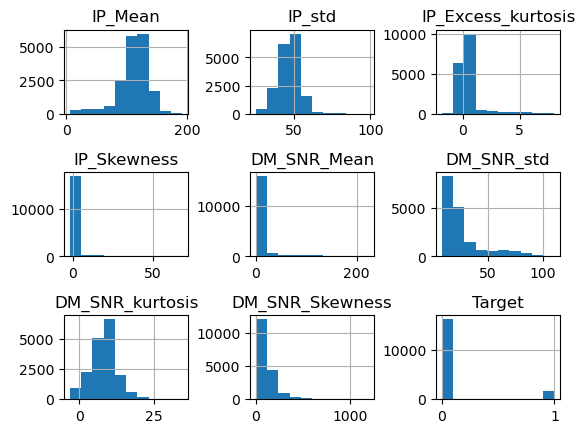

In [69]:
#  just plot all the columns then we can identify the outliers

import matplotlib.pyplot as plt

plt.figure(figsize=(8,9))

new_df.hist(); # used to visualize for all the columns 
plt.subplots_adjust(hspace=0.7, wspace=0.5)

In [70]:
# 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)

In [71]:
## Check for the correlation for X_train dataset

corr_mat = X_train.corr()
corr_mat

,IP_Mean,IP_std,IP_Excess_kurtosis,IP_Skewness,DM_SNR_Mean,DM_SNR_std,DM_SNR_kurtosis,DM_SNR_Skewness
IP_Mean,1.000000,0.555476,-0.872750,-0.737306,-0.295808,-0.302581,0.231370,0.142441
IP_std,0.555476,1.000000,-0.528687,-0.543673,-0.001772,-0.054160,0.033102,0.028738
IP_Excess_kurtosis,-0.872750,-0.528687,1.000000,0.946210,0.414275,0.431562,-0.341319,-0.216255
IP_Skewness,-0.737306,-0.543673,0.946210,1.000000,0.416031,0.416783,-0.330500,-0.207519
DM_SNR_Mean,-0.295808,-0.001772,0.414275,0.416031,1.000000,0.795948,-0.617323,-0.358922
DM_SNR_std,-0.302581,-0.054160,0.431562,0.416783,0.795948,1.000000,-0.812440,-0.582631
DM_SNR_kurtosis,0.231370,0.033102,-0.341319,-0.330500,-0.617323,-0.812440,1.000000,0.925384
DM_SNR_Skewness,0.142441,0.028738,-0.216255,-0.207519,-0.358922,-0.582631,0.925384,1.000000


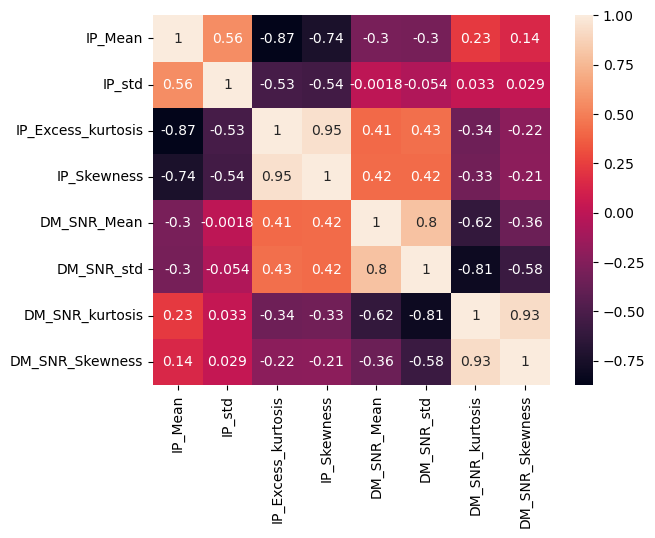

In [72]:
# Visualize the matrix

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mat,annot=True)
plt.show()

In [73]:
corr_mat.columns

Index(['IP_Mean', 'IP_std', 'IP_Excess_kurtosis', 'IP_Skewness', 'DM_SNR_Mean',
       'DM_SNR_std', 'DM_SNR_kurtosis', 'DM_SNR_Skewness'],
      dtype='object')

In [74]:
# Removing the highly correlated feature and normaly we use above 0.8

def correlation(dataset,threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                # if we use abs() than it will consider - corr as + corr
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

corr_feature = correlation(X_train,0.8)

In [75]:
corr_feature

['IP_Skewness', 'DM_SNR_Skewness']

In [76]:
# Drop those feature from X_train
X_train.drop(corr_feature,axis=1)

,IP_Mean,IP_std,IP_Excess_kurtosis,DM_SNR_Mean,DM_SNR_std,DM_SNR_kurtosis
16663,84.898438,37.397744,0.515647,3.624582,20.324344,6.517491
11455,144.929688,44.395626,0.016636,9.422241,37.273707,4.059634
14061,97.710938,55.436359,0.409634,1.752508,13.780674,10.697118
6939,102.507812,52.275860,0.336550,1.836957,13.972477,10.360940
5527,131.664062,48.250531,-0.136420,1.017559,12.984189,15.393311
...,...,...,...,...,...,...
16840,115.343750,40.741456,0.418251,2.712375,19.302491,8.416572
11863,142.289062,53.775307,-0.085549,3.183110,19.438371,8.403920
17093,115.921875,51.599359,0.286135,1.704013,14.347142,10.540606
8366,108.476562,46.560439,0.205884,0.676421,9.688880,19.144668


In [77]:
# Drop those feature from X_test
X_test.drop(corr_feature,axis=1)

,IP_Mean,IP_std,IP_Excess_kurtosis,DM_SNR_Mean,DM_SNR_std,DM_SNR_kurtosis
16151,113.546875,43.270923,0.190630,2.318562,18.711720,10.102548
15204,145.898438,51.395653,-0.412945,6.017559,31.805384,5.812721
7379,94.554688,42.756361,0.454348,2.680602,16.242827,9.447211
4488,110.742188,49.608033,0.154521,2.024247,17.640129,9.650715
6392,137.046875,45.906981,-0.287368,3.271739,21.066360,7.311393
...,...,...,...,...,...,...
14507,132.750000,57.105713,-0.073897,4.000836,23.785676,6.789812
17041,109.781250,45.421625,0.356715,2.974080,16.796246,7.489498
5673,61.546875,38.901289,3.024489,27.793478,57.332189,2.237569
7871,87.750000,36.123054,0.737663,3.509197,17.390145,7.032114


In [78]:
# h)
from sklearn import svm
model = svm.SVC(kernel='rbf')

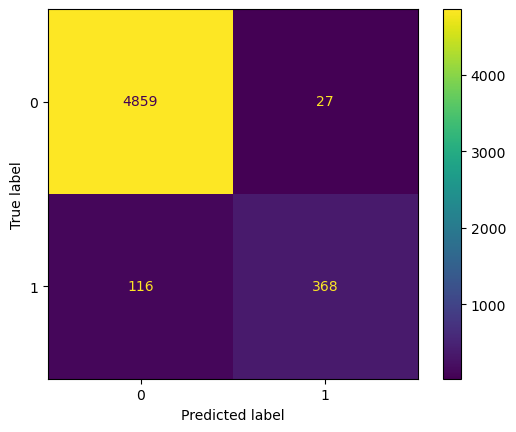

In [79]:
# i) fit the model and calculate the accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model.fit(X_train,y_train)
predicted_value = model.predict(X_test)
## Accuracy using confusion_matrix

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

cm = confusion_matrix(y_test,predicted_value,labels=model.classes_)

#sns.heatmap(cm,annot=True)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=model.classes_)

disp.plot()
plt.show()

In [80]:
# another accuracy metrics
from sklearn.metrics import f1_score
print(f"Accuracy of the mnodel is : {f1_score(y_test,predicted_value,average='weighted'):.2f}")


Accuracy of the mnodel is : 0.97


In [81]:
model11 = svm.SVC(kernel = 'rbf',C=100)
model12 = svm.SVC(kernel = 'rbf',C=1000)

mode21 = svm.SVC(kernel = 'linear',C=1.0)
mode22 = svm.SVC(kernel = 'linear',C=100.0)
mode23 = svm.SVC(kernel = 'linear',C=1000.0)

mode31 = svm.SVC(kernel = 'poly',C=1.0)
mode32 = svm.SVC(kernel = 'poly',C=100.0)

mode41 = svm.SVC(kernel = 'sigmoid',C=1.0)
mode42 = svm.SVC(kernel = 'sigmoid',C=100)

In [82]:
# model11 = svm.SVC(kernel = 'rbf',C=100)
model11.fit(X_train,y_train)
predict11=model11.predict(X_test)
print(f"Accuracy of the mnodel11 is : {f1_score(y_test,predict11,average='weighted'):.3f}")

Accuracy of the mnodel11 is : 0.979


In [ ]:
# model12 = svm.SVC(kernel = 'rbf',C=1000)
model12.fit(X_train,y_train)
predict12=model11.predict(X_test)
print(f"Accuracy of the mnodel12 is : {f1_score(y_test,predict12,average='weighted'):.3f}")